In [178]:
import sklearn
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,make_scorer
from ConstructDatatset import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from TotalCalculation import *
from preprocessing import *
from ClassPrediction import *

In [179]:
df1 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\CSV_dataset\Dataset_06_2024')
df2 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\CSV_dataset\Dataset_12_2023')

In [180]:
date1 = []
for i in df1.index.tolist():
    date1.append(timeConvertion().ticks_to_datetime(i,time_zone=7))
df1['Time'] = date1
date2 = []
for i in df2.index.tolist():
    date2.append(timeConvertion().ticks_to_datetime(i,time_zone=7))
df2['Time'] = date2


In [181]:
df1['Time (decimal)'] = df1['Time'].dt.hour+df1['Time'].dt.minute/60
df2['Time (decimal)'] = df2['Time'].dt.hour+df2['Time'].dt.minute/60

name_y = str('Blue channel')
name_x = np.arange(len(df))
dintr = np.gradient(df['Blue channel'])
dintb = np.gradient(df['Red channel'])

plt.figure(figsize=(30,20))
sns.lineplot(data=df,x=name_x,y=df[name_y],c='blue')
sns.lineplot(data=df,x=name_x,y=df['Red channel'],c='green')
sns.lineplot(data=df,x=name_x,y=df['intensity'])
plt.plot(dintr)
plt.plot(dintb,c='r')

df

In [182]:
start_date = '2024-01-01'
end_date = str(df1['Time'].tolist()[1])
location = [18.849417,98.9538]
days = timeConvertion().time_duration(start_date,end_date,include_end_date=True).days

LSTM = SunPosition.LSTM(time_zone_offset=7)
EoT = SunPosition.calculate_EoT(day=days)
TC = SunPosition.TimeCorrectionFactor(Longitude=location[1],LSTM=LSTM,EoT=EoT)
dec = SunPosition.declination(day=days)
suntime = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)
sunrise1,sunset1 = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)

start_date = '2023-01-01'
end_date = str(df2['Time'].tolist()[1])
location = [18.849417,98.9538]
days = timeConvertion().time_duration(start_date,end_date,include_end_date=True).days

LSTM = SunPosition.LSTM(time_zone_offset=7)
EoT = SunPosition.calculate_EoT(day=days)
TC = SunPosition.TimeCorrectionFactor(Longitude=location[1],LSTM=LSTM,EoT=EoT)
dec = SunPosition.declination(day=days)
suntime = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)
sunrise2,sunset2 = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)

In [183]:
df1 = Builddataset().DayNightSplit(suntime=[sunrise1,sunset1],Mode='day',dataframe=df1)
df2 = Builddataset().DayNightSplit(suntime=[sunrise2,sunset2],Mode='day',dataframe=df2)

df = pd.concat([df1,df2])

In [184]:
x = df.drop(columns=['Time (decimal)','Time','correlation','Blue channel','Red channel','intensity'])

dataset = list(x.itertuples(index=False,name=None))
dataset = np.array(dataset)

In [185]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19888 entries, 638377627911858033 to 638377154550673052
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   contrast        19888 non-null  float64       
 1   dissimilarity   19888 non-null  float64       
 2   homogeneity     19888 non-null  float64       
 3   energy          19888 non-null  float64       
 4   correlation     19888 non-null  float64       
 5   ASM             19888 non-null  float64       
 6   intensity       19888 non-null  float64       
 7   Red channel     19888 non-null  float64       
 8   Blue channel    19888 non-null  float64       
 9   skewness        9944 non-null   float64       
 10  Time            19888 non-null  datetime64[ns]
 11  Time (decimal)  19888 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 2.0 MB


<Axes: >

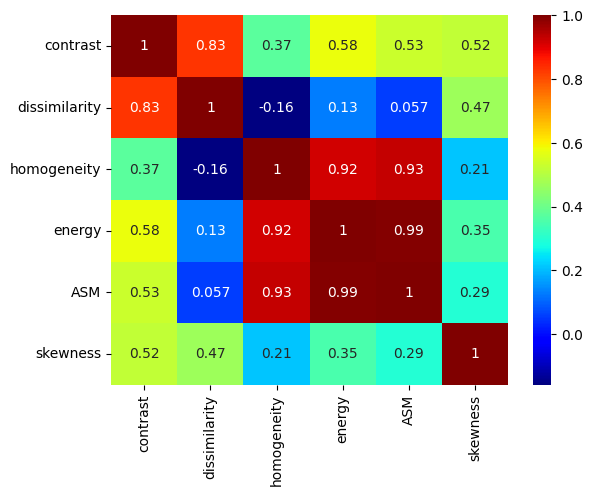

In [186]:
sns.heatmap(data=x.corr(),cmap='jet',annot=True)

In [187]:
from sklearn.metrics.pairwise import euclidean_distances
np.random.seed(42)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init='auto', random_state=42, tol=1e-4,max_iter=300,algorithm='elkan')
minik = MiniBatchKMeans(n_clusters=5,batch_size=1036, max_no_improvement=40, tol=1e-4, random_state=42, init='k-means++' ,n_init=10, max_iter=300 ,reassignment_ratio=0.001)
#af = AffinityPropagation(damping=0.95, max_iter=500, convergence_iter=20, preference=-50, affinity='euclidean')
GMM = GaussianMixture(n_components=7, tol=1e-4, init_params='kmeans',covariance_type='full', max_iter=500, random_state=42, n_init=10)
labels = GMM.fit_predict(dataset)
labels_kmean = kmeans.fit_predict(dataset)
labels_minik = minik.fit_predict(dataset)
#labels_af = af.fit_predict(dataset)

ValueError: Input X contains NaN.
GaussianMixture does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#df.loc[:, 'Label_GMM'] = labels
#df.loc[:, 'Label_Kmean'] = labels_kmean
#df.loc[:, 'Label_AF'] = labels_af

<Axes: xlabel='homogeneity', ylabel='contrast'>

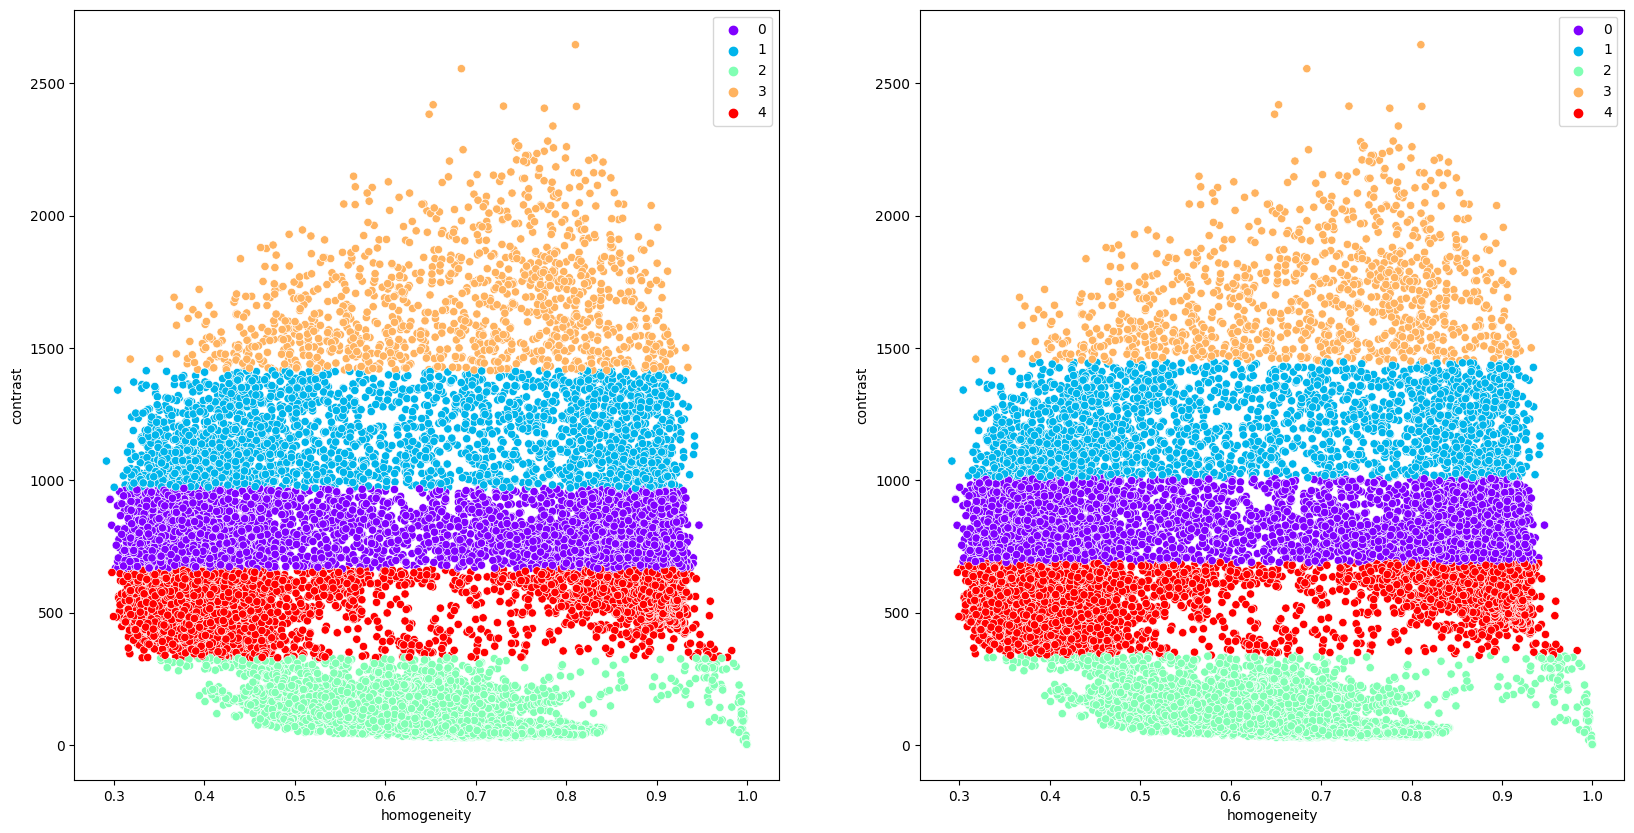

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x=df['homogeneity'],y=df['contrast'],hue=labels_minik,palette='rainbow')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['homogeneity'],y=df['contrast'],hue=labels_kmean,palette='rainbow')

In [ ]:
print(silhouette_score(dataset,labels_kmean))
print(silhouette_score(dataset,labels_minik))
#print(silhouette_score(dataset,labels))

0.6014550865213036
0.5974619289154816


from sklearn.model_selection import GridSearchCV

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)
# Example adjustment for KMeans
param_grid_kmeans = {
    'tol' : [1e-4,1e-5,1e-6],
    'n_clusters': [5, 7, 9, 11],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 'auto'],
    'max_iter': [300, 500, 700],
    'batch_size': [536,1036,1536]
}
grid_search_kmeans = GridSearchCV(MiniBatchKMeans(random_state=42), param_grid_kmeans, cv=5, scoring=silhouette_scorer)
grid_search_kmeans.fit(dataset)  # X is your data

best_kmeans = grid_search_kmeans.best_estimator_


print(best_kmeans)

In [ ]:
print(best_kmeans)
#KMeans(n_clusters=5, n_init=20, random_state=42, tol=1e-05) : sobel
#KMeans(init='k-means++', n_clusters=5, n_init=20, random_state=42, tol=1e-05,algorithm='lloyd')

#MiniBatchKMeans(max_iter=300, n_clusters=5, n_init=10, random_state=42,tol=0.0001) : sobel
#MiniBatchKMeans(n_clusters=5,batch_size=1500, max_no_improvement=30, tol=1e-4, random_state=42, init='k-means++' ,n_init=10, max_iter=500 ,reassignment_ratio=0.001)
#--normal glcm---
#MiniBatchKMeans(batch_size=500, max_iter=300, n_clusters=5, n_init=20,random_state=42, tol=1e-05) \\ same
#KMeans(n_clusters=5, n_init='auto', random_state=42)
#---------New dataset--------#
#KMeans(n_clusters=5, n_init='auto', random_state=42)
#MiniBatchKMeans(batch_size=1036, max_iter=300, n_clusters=5, n_init=20,random_state=42, tol=0.0001)
#KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=42)
#MiniBatchKMeans(batch_size=1036, max_iter=300, n_clusters=5, n_init=10,random_state=42, tol=1e-06)

NameError: name 'best_kmeans' is not defined

import pickle 

with open('af_model_1.pkl','wb') as f:
    pickle.dump(af,f)

import pickle
with open('gmm_model_Nonesobel_match.pkl', 'wb') as f:
    pickle.dump(GMM, f)
with open('kmean_model_Nonesobel_match.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('miniBkmean_model_Nonesobel_match.pkl', 'wb') as f:
    pickle.dump(minik, f)

from preprocessing import image
image_list = image.getFilename(r'C:\Users\ASUS\Documents\NARIT_internship_data\Test_folder')

filetime = []
for file in image_list:
    filetime.append(int(os.path.splitext(os.path.basename(file))[0]))


viz = visualizer()
number = 1
source_folder = r'All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-12'
destination_folder = r'C:\Users\ASUS\Documents\NARIT_internship_2024\Tester'

viz.copy_matching_files(df=viz.match_label(df=df,number=number), source_folder=source_folder, destination_folder=destination_folder)

pred = prediction()
path = r'All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-09\638534868144584540.png'
pred_1,pred_2,cloud_percentage,sky_status,final = pred.total_prediction(image_path=path,mask_path='mask_delete_5.png',crop_size=570,kmeans=kmeans,GMM=GMM,df=df)

mask = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)
mask = crop_center(img=mask,crop_size=570)
img,name = load_single_image(path=path,crop_size=570,mask=mask,apply_crop_sun=False)
image,value,RB = pred.RBsingle(input=img,dataframe=df)
cloud_ratio = pred.CloudRatio(image=img,mask=mask)

import requests
import cv2
import numpy as np
import hashlib
import time

def get_image_hash(image_data):
    return hashlib.md5(image_data).hexdigest()

image_url = "http://weather.narit.or.th/images/allskyimage/ASTROPARK/2024-08-19"
previous_hash = None

while True:
    # Fetch the image from the web
    response = requests.get(image_url)
    if response.status_code == 200:
        # Get the current hash of the image
        current_hash = get_image_hash(response.content)
        
        # Compare with the previous hash
        if current_hash != previous_hash:
            # The image has changed
            print("Image has changed, updating display...")
            image_array = np.frombuffer(response.content, np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            cv2.imshow('Auto-Updated Image', image)
            
            # Update the previous hash
            previous_hash = current_hash
            
            # Wait for 1 second to avoid rapid flickering
            if cv2.waitKey(1000) & 0xFF == ord('q'):
                break
        else:
            print("No change detected.")
    
    # Check every 10 seconds for a change
    time.sleep(10)
    cv2.destroyAllWindows()


sns.scatterplot(data=df,x=df['contrast'],y=df['homogeneity'],hue=labels_kmean)

sns.heatmap(df.corr(),annot=True)